# **TEXT PROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/NLP/twitter16m.csv', encoding = 'latin1', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df = df[[5, 0]]

In [ ]:
df.columns = ['twitts', 'sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [ ]:
sent_map = {0:'negative', 4:'positive'}

###**Word Counts**

In [ ]:
df['word_counts'] = df['twitts'].apply(lambda x : len(str(x).split()))

In [ ]:
df.head()

,twitts,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### **Character Counts**

In [ ]:
df['char_counts'] = df['twitts'].apply(lambda x : len(x))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### **Average Word Length**

In [ ]:
def get_avg_word_len(x):
  words = x.split()
  word_len = 0
  for word in words:
    word_len = word_len  + len(word)
  return word_len/len(words) 

In [ ]:
df['avg_word_len'] = df['twitts'].apply(lambda x : get_avg_word_len(x))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


### **Stop Words Count**

In [ ]:
print(STOP_WORDS)

{'than', 'becoming', 'upon', 'therein', 'was', 'n’t', 'least', 'against', 'during', 'seem', 'off', 'amount', 'will', 'may', 'herself', 'former', "'s", 'i', 'wherever', 'even', 'also', 'somehow', 'at', 'empty', 'whither', 'might', 'really', 'move', 'about', 'as', 'keep', 'indeed', 'too', 'whereupon', 'until', 'hence', 'not', '‘d', 'via', 'them', 'yourselves', 'rather', 'done', 'however', 'front', 'below', 'ourselves', 'along', 'well', 'one', 'thereby', 'the', 'this', 'without', 'most', 'thence', 'behind', 'full', 'on', 'formerly', 'sometimes', 'myself', 'none', 'anyway', 'say', 'anyone', 'these', 'if', 'under', 'several', 'though', 'nor', 'call', 'twenty', 'already', 'throughout', 'our', 'by', 'last', 'all', 'him', 'itself', 'they', '’m', 'anywhere', 'name', '‘re', 'those', 'thereafter', 'further', 'some', 'and', 'among', 'are', 'just', 'in', 'their', 'namely', 'whom', 'but', 'serious', 'get', 'hereby', 'besides', 'when', 'what', 'above', 'quite', 'various', 'being', 'of', 'back', 'ours

In [ ]:
# Calculating number of stop word in each row
df['stop_words_len'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t in STOP_WORDS]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


### **Count #HashTags and @Mentions**

In [ ]:
df['hashtags_count'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


###**if numeric digits are present in twitts**

In [ ]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


### **UPPER case words count**

In [ ]:
df['upper_counts'] = df['twitts'].apply(lambda x : len([t for t in x.split() if t.isupper() and len(x)>3]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [ ]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## **Preprocessing and Cleaning**

### **Lower case conversion** 

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [ ]:
df.head(2)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0


### **Contraction to Expansion**

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / i will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x


In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

CPU times: user 51.3 s, sys: 164 ms, total: 51.4 s
Wall time: 51.5 s


### **Count and Remove Emails**

In [ ]:
import re

In [ ]:
#x = 'hi my email me at email@email.com another@email.com'

In [ ]:
#re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x) 

In [ ]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [ ]:
df['emails_count'] = df['emails'].apply(lambda x : len(x))

In [ ]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','', x))

In [ ]:
df[df['emails_count']>0].head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that has / that is kinda sa...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


###**COUNT URLs And REMOVE it**

In [ ]:
#x = 'hi, to watch more visit https://www.youtube.com/kgptalkie'

In [ ]:
#re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

In [ ]:
df['urls_flag'] = df['twitts'].apply(lambda x : len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [ ]:
#re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that has / that is a bumm...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [ ]:
df.loc[0]['twitts']

'@switchfoot  - awww, that has / that is a bummer.  you shoulda got david carr of third day to do it. ;d'

###**Remove RT**

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub('RT',"" ,x))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that has / that is a bumm...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it has / it is not behavi...",0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Remove Special Characters or Punctuation Removal**

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub('[^A-Z a-z 0-9-]+', '' ,x))   

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that has that is a bummer ...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving ...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Remove multiple spaces** 



In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : " ".join(x.split()))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that has that is a bummer yo...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving a...,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Remove HTML tags**

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
%%time
# commenting as it is taking long to compile
# df['twitts'] = df['twitts'].apply(lambda x : BeautifulSoup(x, 'lxml').get_text())

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


### **Remove Accented Characters**

In [ ]:
import unicodedata

In [ ]:
def remove_accented_chars(x): 
  x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return x

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : remove_accented_chars(x))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that has that is a bummer yo...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it has it is not behaving a...,0,21,111,4.285714,10,0,1,0,1,[],0,0


## **SpaCy and NLP**

###**Remove Stop Words**

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x :" ".join([t for t in x.split() if t not in STOP_WORDS]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Convert into root or base form of word**

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x= 'kenichan dived times ball managed save 50 rest'

In [ ]:
def make_to_base(x):
  x_list = []
  doc = nlp(x)

  for token in doc:
    lemma = str(token.lemma_)
    if lemma == '-PRON-' or lemma == 'be' :
      lemma = token.text
    x_list.append(lemma)
  print(" ".join(x_list))


In [ ]:
# make_to_base(x)

In [ ]:
# I am commenting this as it will take to long too compile
# df['twitts'] = df['twitts'].apply(lambda x : make_to_base(x))

### **Common words removal**

In [ ]:
df.head()['twitts']

0    switchfoot - awww bummer shoulda got david car...
1    upset update facebook texting cry result schoo...
2    kenichan dived times ball managed save 50 rest...
3                           body feels itchy like fire
4                         nationwideclass behaving mad
Name: twitts, dtype: object

In [ ]:
' '.join(df.head()['twitts'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [ ]:
text = ' '.join(df['twitts'])
text = text.split()
freq_comm = pd.Series(text).value_counts()

In [ ]:
freq_comm

good              89366
day               82299
like              77735
-                 69662
today             64512
                  ...  
matty500              1
fernandodl            1
j0rdan                1
allesinderwelt        1
psstthink             1
Length: 787042, dtype: int64

In [ ]:
f20 = freq_comm[:20]
f20

good      89366
day       82299
like      77735
-         69662
today     64512
going     64078
love      63421
work      62804
got       60749
time      56081
lol       55094
u         52833
know      51172
im        50147
want      42070
new       41995
think     41040
night     41029
amp       40616
thanks    39311
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x : " ".join([t for t in x.split() if t not in f20]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Removing rare words**

In [ ]:
rare20 = freq_comm[-20:]
rare20

wullah             1
grrrind            1
msingcalifornia    1
bearworld          1
flintstonesyup     1
alwd               1
kricbradley        1
tryingtoohard      1
ilovechuckbass     1
2465               1
parafield          1
fixednow           1
girlfriendwhat     1
palatino           1
goingwonderful     1
matty500           1
fernandodl         1
j0rdan             1
allesinderwelt     1
psstthink          1
dtype: int64

In [ ]:
rare = freq_comm[freq_comm.values == 1]
rare

yixq               1
tonightsomebody    1
drdave427          1
rodbegbie          1
daygoodnite        1
                  ..
matty500           1
fernandodl         1
j0rdan             1
allesinderwelt     1
psstthink          1
Length: 535889, dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [ ]:
df.head()

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


### **Word Cloud Visualization**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot  as plt
%matplotlib inline

In [ ]:
x =' '.join(text[:20000])
len(text)

10887976

In [ ]:
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok leslie mad meh lover exception track g

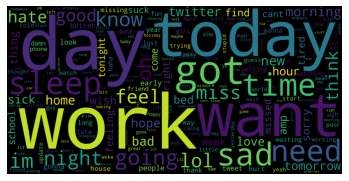

In [ ]:
wc = WordCloud(width = 1800, height = 900).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### **Spelling Correction**

In [ ]:
from textblob import TextBlob

In [ ]:
x = 'tanks forr waching this video carr'

In [ ]:
x = TextBlob(x).correct()

In [ ]:
x

TextBlob("tanks for watching this video care")

### **Tokenization**

In [ ]:
x = 'thanks for watching this video. Please like it'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'video', 'Please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
  print(token)

thanks
for
watching
this
video
.
Please
like
it


These are the two alternate ways to tokenize sentences.

### **Lemmatization**

In [ ]:
from textblob import Word

In [ ]:
x = 'runs run running ran'

In [ ]:
doc = nlp(x)
for token in doc:
  print(token.lemma_)


run
run
run
run


### **Detect entities using NER of SpaCy**

In [ ]:
x = 'Breaking News: Why does  Donald Trump, the President of USA want to mine on the moon? '

In [ ]:
doc = nlp(x)
for ent in doc.ents:
  print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))


Donald Trump - PERSON - People, including fictional


### **Detecting Nouns**

In [ ]:
x

'Breaking News: Why does  Donald Trump, the President of USA want to mine on the moon? '

In [ ]:
for noun in doc.noun_chunks:
  print(noun)

Breaking News
Donald Trump
the President
USA
the moon


### **Translation and language detection**

**Language Code :** https://www.loc.gov/standards/iso639-2/php/code_list.php 

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
tb = TextBlob(x)

In [ ]:
#tb.detect_language()

In [ ]:
#tb.translate(to = 'zh')

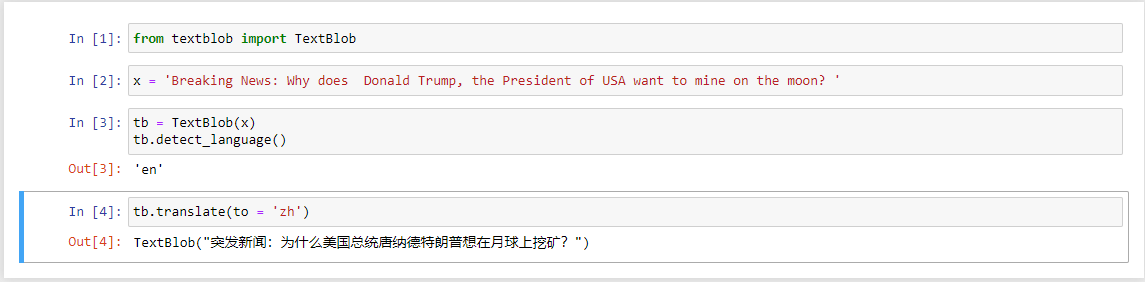

Note:- Above code cell isn't working in google colab, but runs perfectly in jupyter notebook anaconda, so i shared the desired output from there.

### **Use inbuilt sentiment classifier**

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
x = 'you are stupid'

In [ ]:
tb = TextBlob(x, analyzer = NaiveBayesAnalyzer())

In [ ]:
tb.sentiment

Sentiment(classification='neg', p_pos=0.1984606051964413, p_neg=0.8015393948035586)

## **Advanced Text Processing**

###**N-Grams**

In [ ]:
x = 'Thanks for coming'

In [ ]:
tb = TextBlob(x)
tb.ngrams(2)

[WordList(['Thanks', 'for']), WordList(['for', 'coming'])]

In [ ]:
tb.ngrams(1)

[WordList(['Thanks']), WordList(['for']), WordList(['coming'])]

In [ ]:
tb.ngrams(3)

[WordList(['Thanks', 'for', 'coming'])]

###**Bag Of Words**

In [ ]:
x = ['this is first sentence', 'this is second', 'this is last']

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range= (1,1))
text_counts = cv.fit_transform(x)

In [ ]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'last', 'second', 'sentence', 'this']

In [ ]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


###**Term Frequency**
: It is the ratio of the count of a word present in a sentence to the length of the sentence.

In [ ]:
x

['this is first sentence', 'this is second', 'this is last']

In [ ]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [ ]:
bow.shape

(3, 6)

In [ ]:
tf = bow/bow.shape[1]

In [ ]:
for index, row in enumerate(bow.iterrows()):
  for col in row[1].index:
    bow.loc[index, col] = bow.loc[index, col]/sum(row[1].values)

In [ ]:
bow

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


###**Inverse Document Frequency**

idf = log((1+N)/(n+1)) + 1 used in sklearn when smooth_idf = true
where N is the total number of rows and n is the number of rows in which the word was present.

In [ ]:
import numpy as np

In [ ]:
x_df = pd.DataFrame(x, columns=['words'])

In [ ]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [ ]:
N = bow.shape[0]
N

3

In [ ]:
bb = bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [ ]:
bb['is'].sum()

3

In [ ]:
cols = bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [ ]:
nz =[]
for col in cols:
  nz.append(bb[col].sum()) 

In [ ]:
nz

[1, 3, 1, 1, 1, 3]

In [ ]:
idf =[]
for index, col in enumerate(cols):
  idf.append(np.log((N+1)/(nz[index]+1))+1)

In [ ]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

###**Term Frequency and Inverse Document Frequency**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [ ]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [ ]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [ ]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

###**Word Embeddings using SpaCy Word2Vec**

In [ ]:
! python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# nlp = spacy.load('en_core_web_lg')
# doc = nlp('thank you! dog cat lion dfaraft')
# for token in doc:
#    print(token.text, token.has_vector)

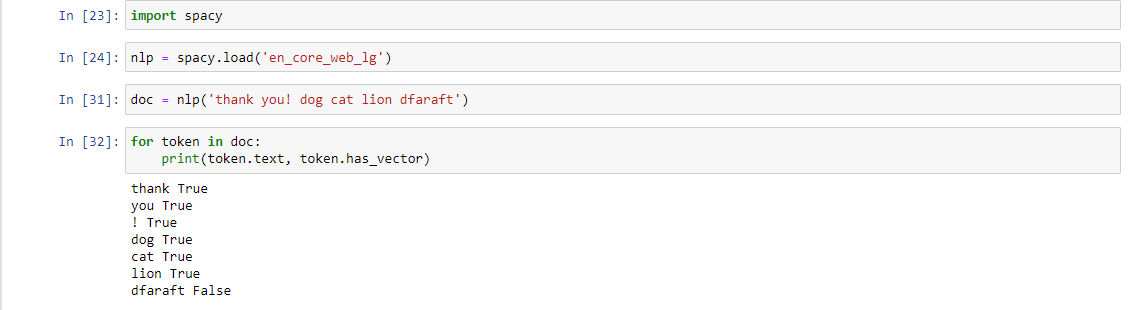

This package isn't working in colab, so we ran it in jupyter where it works perfectly fine.

##**Machine Learning Models for Text Classification**

In [ ]:
df.shape

(1600000, 13)

In [ ]:
df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [ ]:
dfr = df0.append(df4)

In [ ]:
dfr.shape

(4000, 13)

In [ ]:
dfr

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,urls_flag
574596,wowww nails tires,0,10,45,3.500000,6,0,0,0,1,[],0,0
650413,tadi plurk taihoho nyebut,0,5,53,9.600000,0,0,0,0,0,[],0,1
542855,awesome hasbro toy shop sunstreaker stock side...,0,17,121,6.058824,5,0,0,0,0,[],0,1
395306,sick,0,3,19,5.333333,2,0,0,0,0,[],0,0
182222,peacepeaceout wish,0,3,22,6.333333,0,0,1,0,1,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590524,stephenjatdell bought 2,4,10,49,3.900000,3,0,1,1,2,[],0,0
1586409,palinn yes cynic interesting case study great pr,4,16,91,4.687500,7,0,1,0,0,[],0,0
1522720,lodsy lemon head week,4,7,32,3.571429,3,0,0,0,0,[],0,0
1505679,ithynk ill thu moviessumbodyy come,4,9,53,4.888889,3,0,0,0,0,[],0,0


In [ ]:
dfr_feat = dfr.drop(labels=['twitts', 'sentiment', 'emails', 'urls_flag'], axis = 1)

In [ ]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails_count
574596,10,45,3.500000,6,0,0,0,1,0
650413,5,53,9.600000,0,0,0,0,0,0
542855,17,121,6.058824,5,0,0,0,0,0
395306,3,19,5.333333,2,0,0,0,0,0
182222,3,22,6.333333,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1590524,10,49,3.900000,3,0,1,1,2,0
1586409,16,91,4.687500,7,0,1,0,0,0
1522720,7,32,3.571429,3,0,0,0,0,0
1505679,9,53,4.888889,3,0,0,0,0,0


In [ ]:
y = dfr['sentiment']
y

574596     0
650413     0
542855     0
395306     0
182222     0
          ..
1590524    4
1586409    4
1522720    4
1505679    4
987591     4
Name: sentiment, Length: 4000, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [ ]:
text_counts.toarray().shape

(4000, 9705)

In [ ]:
dfr_bog = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dfr_bog.head()

,0128,06,0640,07,0800,090308,09lt3,10,100,1000,10000,1000xs,100g,100pm,100th,1030,1041pm,105,10th,10ugh,11,1139,115,11am,11pm,11th,11yr,12,120cals,120x240,1215,12vspotlight,13,130am,131,13th,14,140,145,14th,...,yuliansari,yum,yumm,yummmmmmm,yummmy,yummy,yup,yupon,yuuummm,yuval050,yvettecraddock,ywitter,yyyooouuu,zaandammi,zabpehely,zack,zackalltimelow,zaibatsu,zangief,zapatabe,zapping,zebra,zee,zeeohingee,zel,zelroid,zenojones,zenzette,zero,zeryck,zezel,ziltch,znatrainer,zoe,zombies,zomgwtfninja,zone,zoo,zq,zt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **ML Algorithms**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier( random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV' : lgrcv, 'SVM' : svm, 'RFC' : rfc}
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [ ]:
def classify(x, y):
  scaler = MinMaxScaler(feature_range = (0,1))
  x = scaler.fit_transform(x)

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify = y  )
  for key in clf.keys():
    clf[key].fit(x_train, y_train)
    y_pred = clf[key].predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    print(key, "---->", ac)

In [ ]:
%%time
classify(dfr_bog, y)

SGD ----> 0.65875
LGR ----> 0.68875
LGR-CV ----> 0.69
SVM ----> 0.6775
RFC ----> 0.6775
CPU times: user 2min 59s, sys: 4.85 s, total: 3min 3s
Wall time: 1min 44s
